<a href="https://colab.research.google.com/github/joyceee916/ATMS-597-SP-2020-Project-4/blob/master/Copy_of_Project4_Joyce_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cd /content/drive/My Drive/ATMS 597/Project4

/content/drive/My Drive/ATMS 597/Project4


Importing KCMI Observational Data

In [11]:
KCMI_daily = pd.read_csv("KCMI_daily_format.csv", parse_dates=True, index_col='Date')
KCMI_daily.rename(columns={'TMAX(C)': 'TMAX_Obs', 'TMIN(C)': 'TMIN_Obs', 'WMAX(M/s)': 'WMAX_Obs', 'PREC(mm}': 'RTOT_Obs'}, inplace = True)
KCMI_daily.dropna(inplace=True)
KCMI_daily.index = KCMI_daily.index + pd.DateOffset(hours=12)  
KCMI_daily = KCMI_daily.rename_axis('Time')
KCMI_daily.head()

,TMAX_Obs,TMIN_Obs,WMAX_Obs,RTOT_Obs
Time,,,,
2010-01-01 12:00:00,-11.111111,-16.666667,6.70560,0.0
2010-01-02 12:00:00,-14.444444,-20.555556,6.70560,0.0
2010-01-03 12:00:00,-12.222222,-21.111111,4.91744,0.0
2010-01-04 12:00:00,-11.666667,-18.888889,8.94080,0.0
2010-01-05 12:00:00,-12.222222,-18.333333,7.15264,0.0


GFS Daily Model 

In [5]:
GFS_daily = pd.read_csv("GFS_daily_2010_2019_test.csv", parse_dates=True, index_col='Time')
GFS_daily.drop(columns="Unnamed: 0", inplace=True)
GFS_daily.rename(columns={'TMAX': 'TMAX_GFS', 'TMIN': 'TMIN_GFS', 'WMAX': 'WMAX_GFS', 'RTOT': 'RTOT_GFS'}, inplace = True)
GFS_daily.dropna(inplace=True)
GFS_daily['month_sin'] = np.sin(GFS_daily.index.month*(2.*np.pi/24))
GFS_daily['month_cos'] = np.cos(GFS_daily.index.month*(2.*np.pi/24))
GFS_daily.head()

,TMAX_GFS,TMIN_GFS,WMAX_GFS,RTOT_GFS,month_sin,month_cos
Time,,,,,,
2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05,0.258819,0.965926
2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,0.258819,0.965926
2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,0.258819,0.965926
2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,0.258819,0.965926
2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,0.258819,0.965926


GFS Surface Data

In [6]:
GFS_surface = pd.read_csv("GFS_surface.csv", parse_dates=True, index_col='Time')
GFS_surface.rename(columns={'DWPC': 'DWPC_Surf', 'HCLD': 'HCLD_Surf', 'LCLD': 'LCLD_Surf', 'MCLD': 'MCLD_Surf',
                            'PRCP': 'PRCP_Surf', 'PRES': 'PRES_Surf', 'TMPC': 'TMPC_Surf', 'UWND': 'UWND_Surf',
                            'VWND': 'VWND_Surf', 'WSPD': 'WSPD_Surf'}, inplace = True)
GFS_surface.dropna(inplace=True)
GFS_surface[0:10]

,DWPC_Surf,HCLD_Surf,LCLD_Surf,MCLD_Surf,PRCP_Surf,PRES_Surf,TMPC_Surf,UWND_Surf,VWND_Surf,WSPD_Surf
Time,,,,,,,,,,
2010-01-02 06:00:00,-13.74,0.0,100.0,1.0,0.00,1000.0,-11.26,4.3,-5.4,6.902898
2010-01-02 09:00:00,-15.19,0.0,100.0,0.0,0.04,1000.4,-12.66,4.9,-5.3,7.218033
2010-01-02 12:00:00,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933
2010-01-02 15:00:00,-20.07,0.0,8.0,0.0,0.00,1002.0,-15.76,4.3,-4.5,6.224147
2010-01-02 18:00:00,-18.81,0.0,2.0,0.0,0.00,1001.3,-13.86,4.6,-4.0,6.095900
2010-01-02 21:00:00,-17.79,0.0,2.0,0.0,0.00,999.8,-13.36,3.6,-5.0,6.161169
2010-01-03 00:00:00,-18.55,0.0,2.0,0.0,0.00,1000.6,-15.26,2.1,-4.8,5.239275
2010-01-03 03:00:00,-19.36,0.0,4.0,0.0,0.00,1000.9,-16.06,2.1,-4.1,4.606517
2010-01-03 06:00:00,-19.79,0.0,6.0,0.0,0.00,1000.8,-16.46,2.0,-2.9,3.522783


In [30]:
# TWO VALUES FOR ALL THE 6AM TIMES 
GFS_surface1 = pd.read_csv("GFS_surface.csv", parse_dates=True, index_col='Time')
GFS_surface1.rename(columns={'DWPC': 'DWPC_Surf', 'HCLD': 'HCLD_Surf', 'LCLD': 'LCLD_Surf', 'MCLD': 'MCLD_Surf',
                            'PRCP': 'PRCP_Surf', 'PRES': 'PRES_Surf', 'TMPC': 'TMPC_Surf', 'UWND': 'UWND_Surf',
                            'VWND': 'VWND_Surf', 'WSPD': 'WSPD_Surf'}, inplace = True)
GFS_surface1.dropna(inplace=True)
GFS_surface1[0:50]

,DWPC_Surf,HCLD_Surf,LCLD_Surf,MCLD_Surf,PRCP_Surf,PRES_Surf,TMPC_Surf,UWND_Surf,VWND_Surf,WSPD_Surf
Time,,,,,,,,,,
2010-01-02 06:00:00,-13.74,0.0,100.0,1.0,0.00,1000.0,-11.26,4.3,-5.4,6.902898
2010-01-02 09:00:00,-15.19,0.0,100.0,0.0,0.04,1000.4,-12.66,4.9,-5.3,7.218033
2010-01-02 12:00:00,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933
2010-01-02 15:00:00,-20.07,0.0,8.0,0.0,0.00,1002.0,-15.76,4.3,-4.5,6.224147
2010-01-02 18:00:00,-18.81,0.0,2.0,0.0,0.00,1001.3,-13.86,4.6,-4.0,6.095900
2010-01-02 21:00:00,-17.79,0.0,2.0,0.0,0.00,999.8,-13.36,3.6,-5.0,6.161169
2010-01-03 00:00:00,-18.55,0.0,2.0,0.0,0.00,1000.6,-15.26,2.1,-4.8,5.239275
2010-01-03 03:00:00,-19.36,0.0,4.0,0.0,0.00,1000.9,-16.06,2.1,-4.1,4.606517
2010-01-03 06:00:00,-19.79,0.0,6.0,0.0,0.00,1000.8,-16.46,2.0,-2.9,3.522783


In [27]:
GFS_surface1.resample('D').mean()

,DWPC_Surf,HCLD_Surf,LCLD_Surf,MCLD_Surf,PRCP_Surf,PRES_Surf,TMPC_Surf,UWND_Surf,VWND_Surf,WSPD_Surf
Time,,,,,,,,,,
2010-01-02,-17.251667,0.000000,52.000000,0.166667,0.008333,1000.700000,-13.610000,4.316667,-5.033333,6.654347
2010-01-03,-17.892222,6.555556,4.444444,0.222222,0.000000,1001.044444,-14.493333,2.177778,-3.355556,4.054763
2010-01-04,-15.457778,-1102.111111,6.444444,12.555556,0.000000,999.044444,-13.015556,3.422222,-3.788889,5.126950
2010-01-05,-13.303333,58.111111,97.666667,44.666667,0.020000,996.666667,-11.360000,4.177778,-3.455556,5.438287
2010-01-06,-11.601111,7.777778,80.555556,5.888889,0.015556,995.477778,-9.882222,2.800000,-1.711111,3.380302
...,...,...,...,...,...,...,...,...,...,...
2020-01-29,-2.871111,71.777778,93.111111,34.666667,0.030000,991.977778,-0.582222,-1.022222,-0.955556,1.579792
2020-01-30,-3.925556,31.555556,65.333333,39.666667,0.046667,994.055556,-0.871111,-0.211111,-0.444444,1.273334
2020-01-31,-1.620000,60.555556,94.111111,61.222222,0.106667,993.066667,0.573333,0.166667,1.088889,1.489875


In [0]:
GFS_surface1.

GFS Profile Data

In [0]:
GFS_profile = pd.read_csv('GFS_profile.csv', index_col='Time', parse_dates=True)
h=GFS_profile.DWPC.str.strip('[|]|,').values

def extract_var_GFS_profile(var, level):
    list = []
    levels = [925.0, 850.0, 700.0, 500.0, 250.0, 100.0]
    x = levels.index(level)
    for i in range(0,len(GFS_profile)):
        e = h[i].split(',')[x]
        list.append(e)
    new_col_name = var + '_' + str(level)
    GFS_profile[new_col_name]=list
GFS_profile_names = ['DWPC', 'HGHT', 'TMPC', 'UWND', 'VWND']
levels = [925.0, 850.0, 700.0, 500.0, 250.0]
for i in GFS_profile_names:
    for j in levels:        
        extract_var_GFS_profile(i,j)
GFS_profile = GFS_profile.drop(GFS_profile_names, axis=1)
GFS_profile = GFS_profile.drop('PRES', axis=1)
GFS_profile.dropna(inplace=True)
GFS_profile = GFS_profile.astype(float)

In [12]:
GFS_profile[0:5]

,DWPC_925.0,DWPC_850.0,DWPC_700.0,DWPC_500.0,DWPC_250.0,HGHT_925.0,HGHT_850.0,HGHT_700.0,HGHT_500.0,HGHT_250.0,TMPC_925.0,TMPC_850.0,TMPC_700.0,TMPC_500.0,TMPC_250.0,UWND_925.0,UWND_850.0,UWND_700.0,UWND_500.0,UWND_250.0,VWND_925.0,VWND_850.0,VWND_700.0,VWND_500.0,VWND_250.0
Time,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02 06:00:00,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427
2010-01-02 09:00:00,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866
2010-01-02 12:00:00,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030
2010-01-02 15:00:00,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348
2010-01-02 18:00:00,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478


Combine Datasets

In [15]:
# Combine GFS daily and KCMI daily
df1 = pd.merge(GFS_daily.reset_index(), KCMI_daily.reset_index(), on='Time', how='inner')
df1.Time = pd.to_datetime(df1.Time)
df1['Year'] = df1.Time.dt.year
df1['D_TMAX'] = df1['TMAX_GFS']-df1['TMAX_Obs']
df1['D_TMIN'] = df1['TMIN_GFS']-df1['TMIN_Obs']
df1['D_WMAX'] = df1['WMAX_GFS']-df1['WMAX_Obs']
df1['D_RTOT'] = df1['RTOT_GFS']-df1['RTOT_Obs']
df1

,Time,TMAX_GFS,TMIN_GFS,WMAX_GFS,RTOT_GFS,month_sin,month_cos,TMAX_Obs,TMIN_Obs,WMAX_Obs,RTOT_Obs,Year,D_TMAX,D_TMIN,D_WMAX,D_RTOT
0,2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05,2.588190e-01,0.965926,-11.111111,-16.666667,6.70560,0.0,2010,-0.148889,0.206667,0.618333,0.05
1,2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,2.588190e-01,0.965926,-14.444444,-20.555556,6.70560,0.0,2010,4.284444,4.595556,-2.018383,0.00
2,2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,2.588190e-01,0.965926,-12.222222,-21.111111,4.91744,0.0,2010,2.262222,6.751111,1.023940,0.06
3,2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,2.588190e-01,0.965926,-11.666667,-18.888889,8.94080,0.0,2010,3.206667,6.028889,-3.255732,0.17
4,2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,2.588190e-01,0.965926,-12.222222,-18.333333,7.15264,0.0,2010,5.062222,7.273333,-3.357907,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,2019-12-27 12:00:00,13.94,3.54,8.819297,2.73,1.224647e-16,-1.000000,6.111111,0.000000,6.70560,0.0,2019,7.828889,3.540000,2.113697,2.73
3572,2019-12-28 12:00:00,15.94,9.34,9.701546,11.58,1.224647e-16,-1.000000,13.333333,0.000000,10.28192,2.8,2019,2.606667,9.340000,-0.580374,8.78
3573,2019-12-29 12:00:00,7.24,-1.66,11.111256,2.57,1.224647e-16,-1.000000,15.000000,5.000000,10.28192,4.3,2019,-7.760000,-6.660000,0.829336,-1.73
3574,2019-12-30 12:00:00,-0.36,-2.26,8.769265,0.04,1.224647e-16,-1.000000,3.333333,-0.555556,11.62304,0.6,2019,-3.693333,-1.704444,-2.853775,-0.56


In [14]:
# Combine GFS Profile and GFS Surface 
df2 = pd.merge(GFS_surface.reset_index(), GFS_profile.reset_index(), on='Time', how='inner')
df2.Time = pd.to_datetime(df2.Time)
df2

,Time,DWPC_Surf,HCLD_Surf,LCLD_Surf,MCLD_Surf,PRCP_Surf,PRES_Surf,TMPC_Surf,UWND_Surf,VWND_Surf,WSPD_Surf,DWPC_925.0,DWPC_850.0,DWPC_700.0,DWPC_500.0,DWPC_250.0,HGHT_925.0,HGHT_850.0,HGHT_700.0,HGHT_500.0,HGHT_250.0,TMPC_925.0,TMPC_850.0,TMPC_700.0,TMPC_500.0,TMPC_250.0,UWND_925.0,UWND_850.0,UWND_700.0,UWND_500.0,UWND_250.0,VWND_925.0,VWND_850.0,VWND_700.0,VWND_500.0,VWND_250.0
0,2010-01-02 06:00:00,-13.74,0.0,100.0,1.0,0.00,1000.0,-11.26,4.3,-5.4,6.902898,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427,-17.885417,-22.151502,-38.936782,-58.098371,-71.388427
1,2010-01-02 09:00:00,-15.19,0.0,100.0,0.0,0.04,1000.4,-12.66,4.9,-5.3,7.218033,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866,-19.453125,-24.938868,-42.044969,-58.101408,-71.386866
2,2010-01-02 12:00:00,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030
3,2010-01-02 15:00:00,-20.07,0.0,8.0,0.0,0.00,1002.0,-15.76,4.3,-4.5,6.224147,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348,-29.030483,-37.651972,-43.764434,-61.130393,-65.861348
4,2010-01-02 18:00:00,-18.81,0.0,2.0,0.0,0.00,1001.3,-13.86,4.6,-4.0,6.095900,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478,-24.848759,-32.677453,-41.067358,-52.434270,-69.264478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40058,2020-02-01 18:00:00,0.29,0.0,100.0,0.0,0.01,986.1,3.24,6.7,0.6,6.726812,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364
40059,2020-02-01 21:00:00,-0.62,100.0,100.0,0.0,0.02,984.3,3.04,6.7,0.7,6.736468,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273
40060,2020-02-02 00:00:00,-0.65,100.0,100.0,29.0,0.00,984.9,1.94,5.4,0.2,5.403702,-2.808421,-24.813403,-15.122155,-22.633966,-59.826654,-2.808421,-24.813403,-15.122155,-22.633966,-59.826654,-2.808421,-24.813403,-15.122155,-22.633966,-59.826654,-2.808421,-24.813403,-15.122155,-22.633966,-59.826654,-2.808421,-24.813403,-15.122155,-22.633966,-59.826654
40061,2020-02-02 03:00:00,-0.77,57.0,39.0,22.0,0.00,984.3,0.24,3.7,2.0,4.205948,-2.543684,-20.719368,-8.265439,-22.454483,-59.816288,-2.543684,-20.719368,-8.265439,-22.454483,-59.816288,-2.543684,-20.719368,-8.265439,-22.454483,-59.816288,-2.543684,-20.719368,-8.265439,-22.454483,-59.816288,-2.543684,-20.719368,-8.265439,-22.454483,-59.816288


In [17]:
# Combine two intermediate datasets into one feature matrix
# Could merge outer to preserve the 3-hour time steps, here I cut those out 
features_df = pd.merge(df1.reset_index(), df2.reset_index(), on='Time', how='outer')
features_df.Time = pd.to_datetime(features_df.Time)
#features_df.dropna(inplace=True)
features_df

,index_x,Time,TMAX_GFS,TMIN_GFS,WMAX_GFS,RTOT_GFS,month_sin,month_cos,TMAX_Obs,TMIN_Obs,WMAX_Obs,RTOT_Obs,Year,D_TMAX,D_TMIN,D_WMAX,D_RTOT,index_y,DWPC_Surf,HCLD_Surf,LCLD_Surf,MCLD_Surf,PRCP_Surf,PRES_Surf,TMPC_Surf,UWND_Surf,VWND_Surf,WSPD_Surf,DWPC_925.0,DWPC_850.0,DWPC_700.0,DWPC_500.0,DWPC_250.0,HGHT_925.0,HGHT_850.0,HGHT_700.0,HGHT_500.0,HGHT_250.0,TMPC_925.0,TMPC_850.0,TMPC_700.0,TMPC_500.0,TMPC_250.0,UWND_925.0,UWND_850.0,UWND_700.0,UWND_500.0,UWND_250.0,VWND_925.0,VWND_850.0,VWND_700.0,VWND_500.0,VWND_250.0
0,0.0,2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05,0.258819,0.965926,-11.111111,-16.666667,6.70560,0.0,2010.0,-0.148889,0.206667,0.618333,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,0.258819,0.965926,-14.444444,-20.555556,6.70560,0.0,2010.0,4.284444,4.595556,-2.018383,0.00,2.0,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030,-24.917708,-29.536604,-42.674858,-55.715014,-67.529030
2,2.0,2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,0.258819,0.965926,-12.222222,-21.111111,4.91744,0.0,2010.0,2.262222,6.751111,1.023940,0.06,13.0,-18.81,9.0,6.0,0.0,0.00,1001.6,-15.96,2.5,-3.0,3.905125,-24.126207,-37.752113,-49.961132,-34.758090,-66.481194,-24.126207,-37.752113,-49.961132,-34.758090,-66.481194,-24.126207,-37.752113,-49.961132,-34.758090,-66.481194,-24.126207,-37.752113,-49.961132,-34.758090,-66.481194,-24.126207,-37.752113,-49.961132,-34.758090,-66.481194
3,3.0,2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,0.258819,0.965926,-11.666667,-18.888889,8.94080,0.0,2010.0,3.206667,6.028889,-3.255732,0.17,24.0,-16.27,0.0,6.0,0.0,0.00,999.3,-14.36,3.9,-3.7,5.375872,-20.262538,-26.830943,-29.101325,-55.621521,-70.317239,-20.262538,-26.830943,-29.101325,-55.621521,-70.317239,-20.262538,-26.830943,-29.101325,-55.621521,-70.317239,-20.262538,-26.830943,-29.101325,-55.621521,-70.317239,-20.262538,-26.830943,-29.101325,-55.621521,-70.317239
4,4.0,2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,0.258819,0.965926,-12.222222,-18.333333,7.15264,0.0,2010.0,5.062222,7.273333,-3.357907,0.77,35.0,-14.64,50.0,100.0,15.0,0.03,996.5,-12.86,4.0,-3.5,5.315073,-14.630465,-14.710332,-21.535714,-34.920932,-63.474719,-14.630465,-14.710332,-21.535714,-34.920932,-63.474719,-14.630465,-14.710332,-21.535714,-34.920932,-63.474719,-14.630465,-14.710332,-21.535714,-34.920932,-63.474719,-14.630465,-14.710332,-21.535714,-34.920932,-63.474719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40074,NaN,2020-02-01 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40058.0,0.29,0.0,100.0,0.0,0.01,986.1,3.24,6.7,0.6,6.726812,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364,-2.420709,-9.530576,-24.005455,-39.451060,-65.706364
40075,NaN,2020-02-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40059.0,-0.62,100.0,100.0,0.0,0.02,984.3,3.04,6.7,0.7,6.736468,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273,-2.718261,-14.782618,-18.144595,-28.904828,-61.717273
40076,NaN,2020-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40060.0,-0.65,100.0,100.0,29.0,0.00,984.9,1.94,5.4,0.2,5.403702,-2.808421,-24.813403,-15.122155,-22.633966,-59.826654

In [0]:
# Split into training and test sets 
# Can change features 
x_train_all = features_df[features_df.Time.dt.year<2019]
x_test_all = features_df[features_df.Time.dt.year==2019]

y_train_all = features_df[features_df.Time.dt.year<2019]
y_test_all = features_df[features_df.Time.dt.year==2019]

Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [20]:
features_df.dtypes

index_x              float64
Time          datetime64[ns]
TMAX_GFS             float64
TMIN_GFS             float64
WMAX_GFS             float64
RTOT_GFS             float64
month_sin            float64
month_cos            float64
TMAX_Obs             float64
TMIN_Obs             float64
WMAX_Obs             float64
RTOT_Obs             float64
Year                 float64
D_TMAX               float64
D_TMIN               float64
D_WMAX               float64
D_RTOT               float64
index_y              float64
DWPC_Surf            float64
HCLD_Surf            float64
LCLD_Surf            float64
MCLD_Surf            float64
PRCP_Surf            float64
PRES_Surf            float64
TMPC_Surf            float64
UWND_Surf            float64
VWND_Surf            float64
WSPD_Surf            float64
DWPC_925.0           float64
DWPC_850.0           float64
DWPC_700.0           float64
DWPC_500.0           float64
DWPC_250.0           float64
HGHT_925.0           float64
HGHT_850.0    

**Linear Regression**

Max Temperature

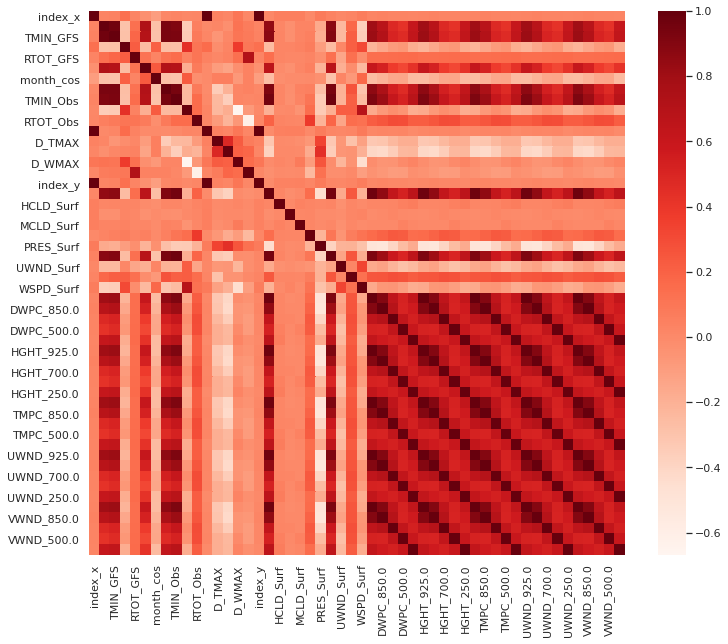

In [21]:
plt.figure(figsize=(12,10))
cor = features_df.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [22]:
# Correlation with output variable 
cor_target = abs(cor['TMAX_Obs'])

relevant_features = cor_target[cor_target>0.70]
relevant_features

TMAX_GFS      0.932905
TMIN_GFS      0.930014
month_sin     0.718327
TMAX_Obs      1.000000
TMIN_Obs      0.942321
DWPC_Surf     0.915275
TMPC_Surf     0.940085
DWPC_925.0    0.865055
DWPC_850.0    0.748135
HGHT_925.0    0.865055
HGHT_850.0    0.748135
TMPC_925.0    0.865055
TMPC_850.0    0.748135
UWND_925.0    0.865055
UWND_850.0    0.748135
VWND_925.0    0.865055
VWND_850.0    0.748135
Name: TMAX_Obs, dtype: float64

In [23]:
# Create linear regression model 
lin_model = LinearRegression()

# pick variables 
features = ['TMAX_GFS', 'TMIN_GFS', 'DWPC_Surf', 'TMPC_Surf', 'DWPC_925.0', 'HGHT_925.0', 'TMPC_925.0', 'UWND_925.0', 'VWND_925.0']
target = ['TMAX_Obs']
x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

lin_model.fit(x_train, y_train)

# Print parameters and plot - GFS Data
print('Coefficients: \n', lin_model.coef_)
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, lin_model.predict(x_test)))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, lin_model.predict(x_test)))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, lin_model.predict(x_test))))

print('Coefficient of determination: %.2f' % r2_score(y_test, lin_model.predict(x_test)))


ValueError: ignored

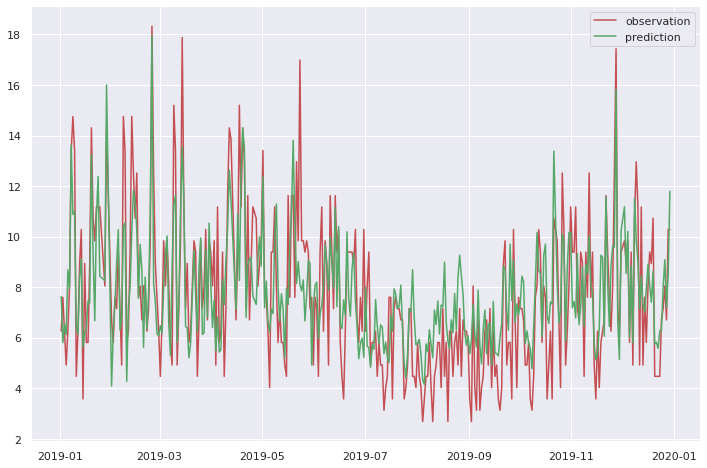

In [0]:
# Plot predicted values against observed values 
time = features_df[features_df['Year']==2019]['Time'].values
plt.figure(figsize=(12,8))
plt.plot(time, y_test, c='r', label='observation')
plt.plot(time, lin_model.predict(x_test), c='g', label='prediction')
plt.legend()
plt.savefig('linearregression.jpg')

Minimum Temperature

In [0]:
# Correlation with output variable 
cor_target = abs(cor['TMIN_Obs'])

relevant_features = cor_target[cor_target>0.90]
relevant_features

TMAX_GFS      0.910530
TMIN_GFS      0.926199
TMAX_Obs      0.941586
TMIN_Obs      1.000000
DWPC_Surf     0.954085
TMPC_Surf     0.968214
DWPC_925.0    0.914160
HGHT_925.0    0.914160
TMPC_925.0    0.914160
UWND_925.0    0.914160
VWND_925.0    0.914160
Name: TMIN_Obs, dtype: float64

In [0]:
# Create linear regression model 
lin_model = LinearRegression()

# pick variables 
features = ['TMAX_GFS', 'TMIN_GFS', 'DWPC_Surf', 'TMPC_Surf', 'DWPC_925.0', 'HGHT_925.0', 'TMPC_925.0', 'UWND_925.0', 'VWND_925.0']
target = ['TMIN_Obs']
x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

lin_model.fit(x_train, y_train)

# Print parameters and plot - GFS Data
print('Coefficients: \n', lin_model.coef_)
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, lin_model.predict(x_test)))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, lin_model.predict(x_test)))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, lin_model.predict(x_test))))

print('Coefficient of determination: %.2f' % r2_score(y_test, lin_model.predict(x_test)))


Coefficients: 
 [[0.10701331 0.21678165 0.0872518  0.56208699 0.01377455 0.01377455
  0.01377455 0.01377455 0.01377455]]
The Mean Absolute Error: 1.76 degrees celsius
The Median Absolute Error: 1.36 degrees celsius
The Root Mean Square Error: 2.35 degrees celsius 
Coefficient of determination: 0.95


Maximum Wind Speed

In [0]:
# Correlation with output variable 
cor_target = abs(cor['WMAX_Obs'])

relevant_features = cor_target[cor_target>0.3]
relevant_features

TMAX_GFS     0.339043
TMIN_GFS     0.323391
WMAX_GFS     0.436786
WMAX_Obs     1.000000
D_WMAX       0.667029
PRES_Surf    0.330282
WSPD_Surf    0.688328
Name: WMAX_Obs, dtype: float64

In [0]:
# Create linear regression model 
lin_model = LinearRegression()

# pick variables 
features = ['TMAX_GFS', 'TMIN_GFS', 'WMAX_GFS', 'PRES_Surf', 'WSPD_Surf']
target = ['WMAX_Obs']
x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

lin_model.fit(x_train, y_train)

# Print parameters and plot - GFS Data
print('Coefficients: \n', lin_model.coef_)
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, lin_model.predict(x_test)))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, lin_model.predict(x_test)))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, lin_model.predict(x_test))))

print('Coefficient of determination: %.2f' % r2_score(y_test, lin_model.predict(x_test)))


Coefficients: 
 [[-0.02454146 -0.00646729  0.27366484 -0.0803725   0.79208545]]
The Mean Absolute Error: 1.55 degrees celsius
The Median Absolute Error: 1.35 degrees celsius
The Root Mean Square Error: 1.96 degrees celsius 
Coefficient of determination: 0.56


Precipitation Accumulation

In [0]:
# Correlation with output variable 
cor_target = abs(cor['RTOT_Obs'])

relevant_features = cor_target[cor_target>0.26]
relevant_features

RTOT_Obs      1.000000
D_RTOT        0.611602
PRCP_Surf     0.383957
DWPC_700.0    0.297225
DWPC_500.0    0.290800
HGHT_700.0    0.297225
HGHT_500.0    0.290800
TMPC_700.0    0.297225
TMPC_500.0    0.290800
UWND_700.0    0.297225
UWND_500.0    0.290800
VWND_700.0    0.297225
VWND_500.0    0.290800
Name: RTOT_Obs, dtype: float64

In [0]:
# Create linear regression model 
lin_model = LinearRegression()

# pick variables 
features = ['D_RTOT','PRCP_Surf', 'DWPC_700.0', 'DWPC_500.0', 'HGHT_700.0', 'HGHT_500.0', 'TMPC_700.0', 'TMPC_500.0', 'UWND_700.0', 'UWND_500.0', 'VWND_700.0', 'VWND_500.0']
target = ['RTOT_Obs']
x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

lin_model.fit(x_train, y_train)

# Print parameters and plot - GFS Data
print('Coefficients: \n', lin_model.coef_)
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, lin_model.predict(x_test)))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, lin_model.predict(x_test)))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, lin_model.predict(x_test))))

print('Coefficient of determination: %.2f' % r2_score(y_test, lin_model.predict(x_test)))


Coefficients: 
 [[-0.38804956  0.76968833  0.01229783  0.01385811  0.01229783  0.01385811
   0.01229783  0.01385811  0.01229783  0.01385811  0.01229783  0.01385811]]
The Mean Absolute Error: 2.63 degrees celsius
The Median Absolute Error: 1.95 degrees celsius
The Root Mean Square Error: 3.70 degrees celsius 
Coefficient of determination: 0.47


**Random Forest**

Maximum Temperature

In [0]:
# Create random forest regression model 
# some code adapted from (https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
from sklearn.ensemble import RandomForestRegressor 

features = ['TMAX', 'TMIN', 'WMAX', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'D_TMAX', 'D_TMIN', 'D_RTOT', 'D_WMAX']
target = ['Max_Temp']

x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

# TODO could create empty numpy arrays and then plot the effect of changing estimators and max features on the errors (4 metrics)
n_estimators = [1, 10, 100]
max_features = [1, 2, 3]
for n in n_estimators: 
    for m in max_features: 
        # Train the model 
        rf_model = RandomForestRegressor(n_estimators=n, max_features=m)
        rf_model.fit(x_train, y_train)

        # Print parameters and plot
        print("# of trees =", n)
        print("Max features = ", m)
        print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, rf_model.predict(x_test)))
        print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, rf_model.predict(x_test)))
        print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, rf_model.predict(x_test))))
        print('Coefficient of determination: %.2f' % r2_score(y_test, rf_model.predict(x_test)))

print(sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_), features), reverse=True))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed whe

# of trees = 1
Max features =  1
The Mean Absolute Error: 3.35 degrees celsius
The Median Absolute Error: 2.78 degrees celsius
The Root Mean Square Error: 4.51 degrees celsius 
Coefficient of determination: 0.86
# of trees = 1
Max features =  2
The Mean Absolute Error: 2.52 degrees celsius
The Median Absolute Error: 1.67 degrees celsius
The Root Mean Square Error: 3.85 degrees celsius 
Coefficient of determination: 0.90
# of trees = 1
Max features =  3
The Mean Absolute Error: 1.97 degrees celsius
The Median Absolute Error: 1.11 degrees celsius
The Root Mean Square Error: 3.15 degrees celsius 
Coefficient of determination: 0.93
# of trees = 10
Max features =  1
The Mean Absolute Error: 1.92 degrees celsius
The Median Absolute Error: 1.39 degrees celsius
The Root Mean Square Error: 2.60 degrees celsius 
Coefficient of determination: 0.95
# of trees = 10
Max features =  2
The Mean Absolute Error: 1.60 degrees celsius
The Median Absolute Error: 1.11 degrees celsius
The Root Mean Square Er

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 100
Max features =  1
The Mean Absolute Error: 1.84 degrees celsius
The Median Absolute Error: 1.39 degrees celsius
The Root Mean Square Error: 2.49 degrees celsius 
Coefficient of determination: 0.96


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 100
Max features =  2
The Mean Absolute Error: 1.28 degrees celsius
The Median Absolute Error: 0.87 degrees celsius
The Root Mean Square Error: 1.77 degrees celsius 
Coefficient of determination: 0.98


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 100
Max features =  3
The Mean Absolute Error: 0.95 degrees celsius
The Median Absolute Error: 0.61 degrees celsius
The Root Mean Square Error: 1.42 degrees celsius 
Coefficient of determination: 0.99
[(0.3455, 'TMAX'), (0.3283, 'TMIN'), (0.1099, 'month_sin'), (0.0907, 'month_cos'), (0.0764, 'D_TMAX'), (0.0165, 'D_TMIN'), (0.0135, 'WMAX'), (0.0075, 'D_RTOT'), (0.0058, 'D_WMAX'), (0.003, 'day_sin'), (0.0027, 'day_cos')]
[(0.3455, 'TMAX'), (0.3283, 'TMIN'), (0.1099, 'month_sin'), (0.0907, 'month_cos'), (0.0764, 'D_TMAX'), (0.0165, 'D_TMIN'), (0.0135, 'WMAX'), (0.0075, 'D_RTOT'), (0.0058, 'D_WMAX'), (0.003, 'day_sin'), (0.0027, 'day_cos')]


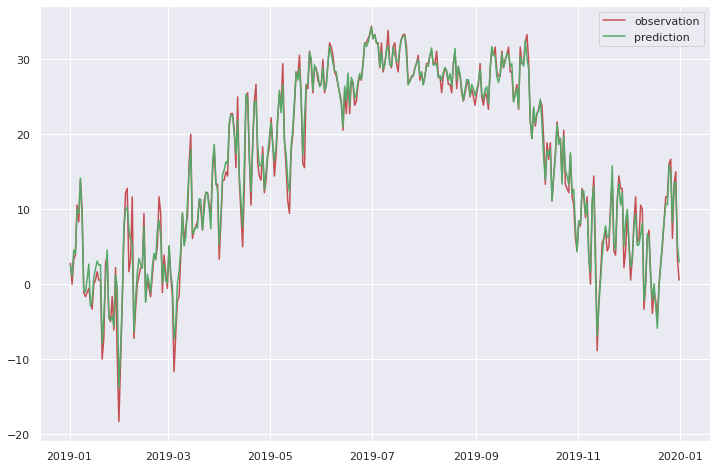

In [0]:
# Plot predicted values against observed values 
time = features_df[features_df['Year']==2019]['Time'].values
plt.figure(figsize=(12,8))
plt.plot(time, y_test, c='r', label='observation')
plt.plot(time, rf_model.predict(x_test), c='g', label='prediction')
plt.legend()
plt.savefig('randomforest.jpg')
plt.show()